In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import matplotlib
matplotlib.style.use('paper')
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Rectangle
from astropy.coordinates import CartesianRepresentation, SphericalRepresentation, Angle, SkyCoord
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

In [2]:
def make_df_field_centers(sc, nrows):
    # 'sc' is an Astropy SkyCoord object with the central RA, Dec coordinate                                                                   
    # 'nrows' is the number of rows of fields to be created in the Declination direction                                                       
    # 'nfields_width' is the number of fields in RA for the center row                                                                         

    # NOTE: 'nrows' must be an odd number                                                                                                      

# separation of field centers in degrees; DF FOV ~1.9x2.6; 10% field overlap                                                                   
    overlap_frac_ra = 0.2
    offset_ra_deg = (2.6*(1.0-overlap_frac_ra))*u.deg
    overlap_frac_dec = 0.1
    offset_dec_deg = (1.9*(1.0-overlap_frac_dec))*u.deg

    ra_offset = offset_ra_deg/np.cos(sc.dec.radian)
    dec_offset = offset_dec_deg

    rownums = np.arange(nrows)-int(nrows/2)

    fields_ra = []
    fields_dec = []

# Row "0" is the one centered on the target. No shift applied to each row.                                                                     
# The number of fields in each row is "nfields_width" for row 0, or generally: "nfields_width - N" for row N                                   

    for row in rownums:
        if np.abs(row) >= 0:
            nfields_row = 13 #np.abs(row+1)                                                                                                   
            rashifts = np.arange(nfields_row) - int(nfields_row/2)
#             if np.mod(row, 2) == 0:                                                                                                           
#                rashifts = np.arange(nfields_row) - int(nfields_row/2)                                                                        
#             else:                                                                                                                             
#                rashifts = np.arange(nfields_row) - int(nfields_row/2) + 0.5                                                                  

            racen = (sc.ra-0*u.deg) + (rashifts*ra_offset)
            deccen = racen*0.0 + ((sc.dec-0*u.deg) - (row*dec_offset))

            fields_ra = np.append(fields_ra, racen.value)
            fields_dec = np.append(fields_dec, deccen.value)

    fields_ra = np.array(fields_ra)
    fields_dec = np.array(fields_dec)

    return fields_ra, fields_dec


In [3]:
## M33:                                                                                                                                        
sc0 = SkyCoord(ra='01h33m50.904s',dec='30d39m34.79s',distance=860.0*u.kpc,frame='icrs')
targetname = 'M33'
sc=sc0


In [58]:
### Select the field centers:                                                                                                                  
                                                                                         
ra_fields, dec_fields = make_df_field_centers(sc, 15)

sc_fields_all = SkyCoord(ra = ra_fields*u.deg, dec = dec_fields*u.deg, frame='icrs')
sc_fields_sep = sc_fields_all.separation(sc0)

# Remove a few to fit within a 2-night observing request:                                                                                      
keep_fields = sc_fields_all.ra.value < 0 # create boolean array with all values True                                                           
keep_fields[((sc_fields_sep.degree) < 3.5*190./50.)] = True                                                                                   
#keep_fields[((sc_fields_sep.degree) < 3.5*170./50.) & ((sc_fields_sep.degree) > 2.0)] = True
#keep_fields[((sc_fields_sep.degree) < 3.5*100./50.) & ((sc_fields_sep.degree+0.75) > 3.5)] = True   

pd_fields = (sc_fields_all.ra.value < 24.) & (sc_fields_all.dec.value > 28.) & (sc_fields_all.dec.value < 32.)
pd_fields2 = (sc_fields_all.ra.value < 22.) &  (sc_fields_all.dec.value > 32.) 
pd_fields3 = (sc_fields_all.ra.value < 24) &  (sc_fields_all.ra.value > 22.)& (sc_fields_all.dec.value > 30) & (sc_fields_all.dec.value < 34.)
out = (sc_fields_all.ra.value > 35.) 
out4 = (sc_fields_all.ra.value < 11.) 

out2 = (sc_fields_all.dec.value > 40.)

out3 = (sc_fields_all.dec.value+decsize/2 > 38.) & (sc_fields_all.ra.value+rasize/2 > 34.)
#out5 =(sc_fields_all.dec.value < 21)& (sc_fields_all.ra.value > 28.)

keep_fields[pd_fields]=False
keep_fields[pd_fields2]=False
keep_fields[pd_fields3]=False

keep_fields[out]=False
keep_fields[out4]=False

keep_fields[out2]=False
keep_fields[out3]=False
sc_fields = sc_fields_all[keep_fields]

# Full Survey

24.7621 40.159663888888886
27.180110046590002 40.159663888888886
29.598120093180007 40.159663888888886
32.016130139770006 40.159663888888886
24.7621 38.44966388888889
27.180110046590002 38.44966388888889
29.598120093180007 38.44966388888889
32.016130139770006 38.44966388888889
24.7621 36.73966388888889
27.180110046590002 36.73966388888889
29.598120093180007 36.73966388888889
32.016130139770006 36.73966388888889
34.43414018636001 36.73966388888889
24.7621 35.02966388888889
27.180110046590002 35.02966388888889
29.598120093180007 35.02966388888889
32.016130139770006 35.02966388888889
34.43414018636001 35.02966388888889
27.180110046590002 33.31966388888889
29.598120093180007 33.31966388888889
32.016130139770006 33.31966388888889
34.43414018636001 33.31966388888889
27.180110046590002 31.609663888888885
29.598120093180007 31.609663888888885
32.016130139770006 31.609663888888885
34.43414018636001 31.609663888888885
27.180110046590002 29.899663888888885
29.598120093180007 29.899663888888885
32

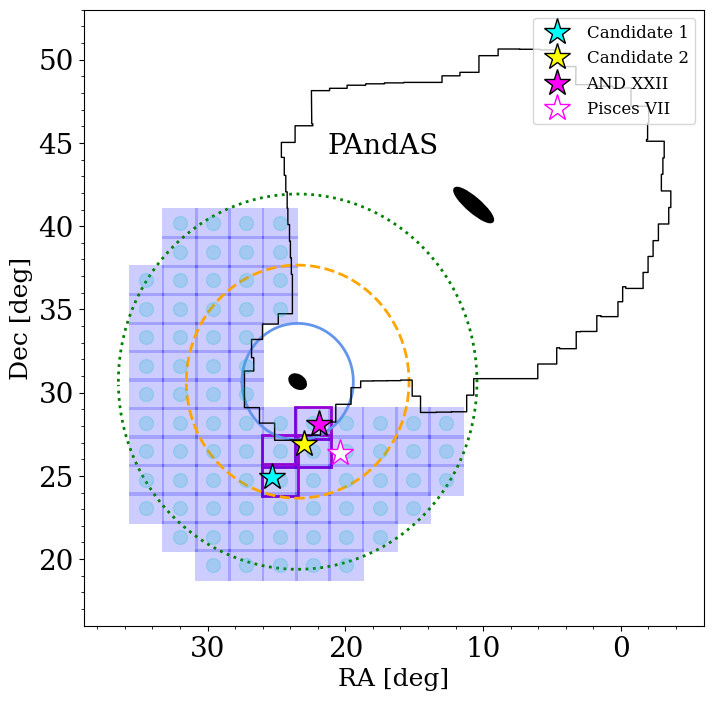

In [80]:
n = 10000
rvir = 161.
#d = 794.
m33 = sc0

fieldcen = m33

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.xlabel('RA [deg]', fontsize=18)
plt.ylabel('Dec [deg]', fontsize=18)

and22 = SkyCoord('01h27m40.0s','28d05m25s', unit='deg')
# candidate = SkyCoord('01h32m56.282s', '28d04m55.833s', unit='deg')
# field1 = SkyCoord('01h27m36.18s', '27d45m35.8s', unit='deg')
# field2 = SkyCoord('01h33m50.9s','27d45m35.8s')
m33 = SkyCoord('01h33m50.0s','30d39m37s', unit='deg')
m31 = SkyCoord('0h42m44.3s', '41d16m9s', unit='deg')

plt.plot(25.33584, 24.90581, '*', color='cyan' ,mec='black',ms=20, label='Candidate 1', zorder=5)
plt.plot(22.97674, 26.89809, '*', color='yellow' ,mec='black',ms=20, label='Candidate 2', zorder=5)
plt.plot(and22.ra.deg, and22.dec.deg, '*', color='magenta' ,mec='black',ms=20, label='AND XXII', zorder=5)
plt.plot(20.418750, 26.390000, '*', color='white' ,mec='magenta',ms=20, label='Pisces VII', zorder=5)

# unit circle at Dec=30 deg.                                                                                                                   
cpts = np.arange(0,360.0,1)
xpts = 1.0*np.cos(np.deg2rad(cpts))/np.cos(30.0*u.deg)
ypts = 1.0*np.sin(np.deg2rad(cpts))

xcirc50 = (xpts*3.5)+m33.ra.value
ycirc50 = (ypts*3.5)+m33.dec.value
plt.plot(xcirc50,ycirc50,color='cornflowerblue')

xcirc100 = (xpts*3.5*100.0/50.0)+m33.ra.value
ycirc100 = (ypts*3.5*100.0/50.0)+m33.dec.value
plt.plot(xcirc100,ycirc100,color='orange',ls='--')

xcirc161 = (xpts*3.5*161.0/50.0)+m33.ra.value
ycirc161 = (ypts*3.5*161.0/50.0)+m33.dec.value
plt.plot(xcirc161,ycirc161,color='green',ls=':')

ring = Wedge((m33.ra.deg, m33.dec.deg), 3.5*100./50., 0, 360, width=(3.5*100./50. - 3.5)),  # Full ring                                        
p = PatchCollection(ring, alpha=0.1)
p.set_color('orange')

m31ell = Ellipse((m31.ra.deg, m31.dec.deg), (200./60.0), (50.0/60.0), angle=35, fill=True, linewidth=2, color='k')
ax.add_patch(m31ell)

m33ell = Ellipse((m33.ra.deg, m33.dec.deg), (73./60.0), (45.0/60.0), angle=23, fill=True, linewidth=2, color='k')
ax.add_patch(m33ell)

dp = np.loadtxt('corners_PAndAS11.txt')
ra = dp[:,0]
dec = dp[:,1]
plt.plot(ra, dec, lw=1, color='k')
plt.xlim(*plt.xlim()[::-1])
plt.figtext(0.43, 0.7, 'PAndAS', fontsize=20, color='k')

###########

rasize = 2.6
decsize = 1.9

#plt.plot(34.43414018636001, 38.44966388888889,'ro', ms=6, zorder=1000)
# plt.plot(22.0979889387619, 26.589663888888886,'co', ms=6)

# plt.plot(24.499999999999996, 26.589663888888886,'co', ms=6, zorder=1000)
# plt.plot(24.499999999999996, 24.87966388888889,'co', ms=6)

fields = open('M33_Dragonfly_Survey_fields.txt', 'w')
for i in range(len(sc_fields)):
    #all fields
    print(sc_fields[i].ra.deg+rasize/2,sc_fields[i].dec.deg+decsize/2)
    plt.plot(sc_fields[i].ra.deg+rasize/2,sc_fields[i].dec.deg+decsize/2, 'co', alpha=0.2)

    field = Rectangle([sc_fields[i].ra.deg, sc_fields[i].dec.deg], 2.6, 1.9, lw=2, facecolor='b', fill=True,alpha=0.2)
    ax.add_patch(field)
    if 21. < sc_fields[i].ra.deg < 23 and 24. < sc_fields[i].dec.deg < 29.:
        field = Rectangle([sc_fields[i].ra.deg, sc_fields[i].dec.deg], 2.6, 1.9, lw=2, edgecolor='darkviolet', fill=False)
        ax.add_patch(field)
    if 23. < sc_fields[i].ra.deg < 25. and 22.5 < sc_fields[i].dec.deg < 27.:
        field = Rectangle([sc_fields[i].ra.deg, sc_fields[i].dec.deg], 2.6, 1.9, lw=2, edgecolor='darkviolet', fill=False)
        ax.add_patch(field)
        
    if sc_fields[i].dec.value+decsize/2 > 38. and (sc_fields[i].ra.value+rasize/2 > 34.):
        plt.plot(sc_fields[i].ra.deg+rasize/2,sc_fields[i].dec.deg+decsize/2, 'ro', alpha=0.2)

    fields.write('%s %s %s \n '%(i+1, sc_fields[i].ra.deg+rasize/2,sc_fields[i].dec.deg+decsize/2))
#plt.plot(and22.ra.deg, and22.dec.deg, '*', color='gold' ,mec='crimson',ms=16, label='AND XXII', zorder=5)
#plt.plot(candidate.ra.deg, candidate.dec.deg,'*', color='orange', mec='darkviolet',ms=16, label='Dragonfly candidate', zorder=5)

#circle4 = mpatches.Circle((field1.ra.deg, field1.dec.deg), 1.5/2., fill=False, color='crimson', lw=2, label='HSC data')
#circle5 = plt.Circle((field2.ra.deg, field2.dec.deg), 1.5/2., fill=False, color='crimson', lw=2)
#plt.gca().add_patch(circle4)
#plt.gca().add_artist(circle5)

plt.xlim(39,-6)
plt.ylim(16,53)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(loc='upper right')
plt.savefig('DF_test_Jun23.png')


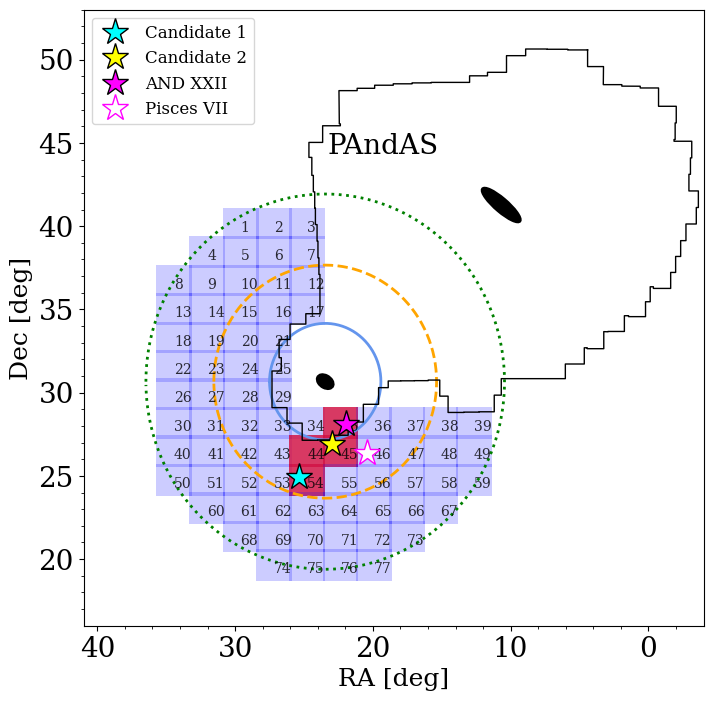

In [14]:
n = 10000
rvir = 161.
#d = 794.
m33 = sc0

fieldcen = m33

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.xlabel('RA [deg]', fontsize=18)
plt.ylabel('Dec [deg]', fontsize=18)

and22 = SkyCoord('01h27m40.0s','28d05m25s', unit='deg')
# candidate = SkyCoord('01h32m56.282s', '28d04m55.833s', unit='deg')
# field1 = SkyCoord('01h27m36.18s', '27d45m35.8s', unit='deg')
# field2 = SkyCoord('01h33m50.9s','27d45m35.8s')
m33 = SkyCoord('01h33m50.0s','30d39m37s', unit='deg')
m31 = SkyCoord('0h42m44.3s', '41d16m9s', unit='deg')

plt.plot(25.33584, 24.90581, '*', color='cyan' ,mec='black',ms=20, label='Candidate 1', zorder=5)
plt.plot(22.97674, 26.89809, '*', color='yellow' ,mec='black',ms=20, label='Candidate 2', zorder=5)
plt.plot(and22.ra.deg, and22.dec.deg, '*', color='magenta' ,mec='black',ms=20, label='AND XXII', zorder=5)
plt.plot(20.418750, 26.390000, '*', color='white' ,mec='magenta',ms=20, label='Pisces VII', zorder=5)

# unit circle at Dec=30 deg.                                                                                                                   
cpts = np.arange(0,360.0,1)
xpts = 1.0*np.cos(np.deg2rad(cpts))/np.cos(30.0*u.deg)
ypts = 1.0*np.sin(np.deg2rad(cpts))

xcirc50 = (xpts*3.5)+m33.ra.value
ycirc50 = (ypts*3.5)+m33.dec.value
plt.plot(xcirc50,ycirc50,color='cornflowerblue')

xcirc100 = (xpts*3.5*100.0/50.0)+m33.ra.value
ycirc100 = (ypts*3.5*100.0/50.0)+m33.dec.value
plt.plot(xcirc100,ycirc100,color='orange',ls='--')

xcirc161 = (xpts*3.5*161.0/50.0)+m33.ra.value
ycirc161 = (ypts*3.5*161.0/50.0)+m33.dec.value
plt.plot(xcirc161,ycirc161,color='green',ls=':')

ring = Wedge((m33.ra.deg, m33.dec.deg), 3.5*100./50., 0, 360, width=(3.5*100./50. - 3.5)),  # Full ring                                        
p = PatchCollection(ring, alpha=0.1)
p.set_color('orange')

m31ell = Ellipse((m31.ra.deg, m31.dec.deg), (200./60.0), (50.0/60.0), angle=35, fill=True, linewidth=2, color='k')
ax.add_patch(m31ell)

m33ell = Ellipse((m33.ra.deg, m33.dec.deg), (73./60.0), (45.0/60.0), angle=23, fill=True, linewidth=2, color='k')
ax.add_patch(m33ell)

dp = np.loadtxt('corners_PAndAS11.txt')
ra = dp[:,0]
dec = dp[:,1]
plt.plot(ra, dec, lw=1, color='k')
plt.xlim(*plt.xlim()[::-1])
plt.figtext(0.43, 0.7, 'PAndAS', fontsize=20, color='k')

###########

rasize = 2.6
decsize = 1.9

#plt.plot(34.43414018636001, 38.44966388888889,'ro', ms=6, zorder=1000)
# plt.plot(22.0979889387619, 26.589663888888886,'co', ms=6)

# plt.plot(24.499999999999996, 26.589663888888886,'co', ms=6, zorder=1000)
# plt.plot(24.499999999999996, 24.87966388888889,'co', ms=6)

field_num, ras, decs = np.loadtxt('M33_Dragonfly_Survey_fields_v2.txt', unpack=True)

for i in range(len(ras)):
    #all fields
    #print(sc_fields[i].ra.deg+rasize/2,sc_fields[i].dec.deg+decsize/2)
    plt.text(ras[i],decs[i]-decsize/4., '%s'%(i+1), alpha=0.8)

    field = Rectangle([ras[i]-rasize/2, decs[i]-decsize/2], 2.6, 1.9, lw=2, facecolor='b', fill=True,alpha=0.2)
    ax.add_patch(field)
    
    if 21. < ras[i] < 23 and 25. < decs[i] < 29.:
        field = Rectangle([ras[i]-rasize/2, decs[i]-decsize/2], 2.6, 1.9, lw=2, facecolor='crimson',alpha=0.8)
        ax.add_patch(field)
    if 23. < ras[i] < 25. and 24 < decs[i] < 27.:
        field = Rectangle([ras[i]-rasize/2, decs[i]-decsize/2], 2.6, 1.9, lw=2, facecolor='crimson',alpha=0.8)
        ax.add_patch(field)


plt.xlim(41,-4)
plt.ylim(16,53)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.legend(loc='upper left')
plt.savefig('DF_M33_Survey_Full_Fields.pdf')


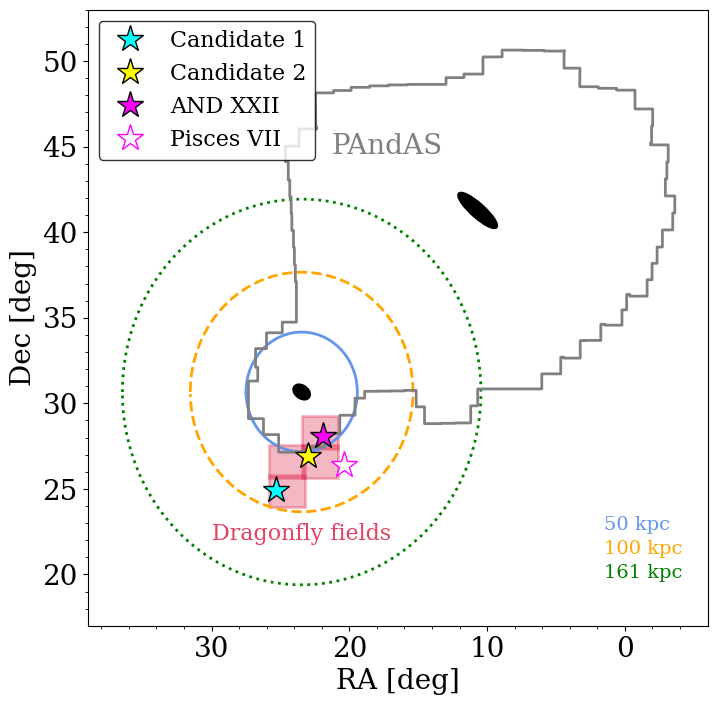

In [60]:
n = 10000
rvir = 161.
d = 794.
m33 = sc0

fieldcen = m33

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.xlabel('RA [deg]', fontsize=20)
plt.ylabel('Dec [deg]', fontsize=20)
and22 = SkyCoord('01h27m40.0s','28d05m25s', unit='deg')
m33 = SkyCoord('01h33m50.0s','30d39m37s', unit='deg')
m31 = SkyCoord('0h42m44.3s', '41d16m9s', unit='deg')
plt.plot(25.33584, 24.90581, '*', color='cyan' ,mec='black',ms=20, label='Candidate 1', zorder=5)
plt.plot(22.97674, 26.89809, '*', color='yellow' ,mec='black',ms=20, label='Candidate 2', zorder=5)
plt.plot(and22.ra.deg, and22.dec.deg, '*', color='magenta' ,mec='black',ms=20, label='AND XXII', zorder=5)
plt.plot(20.418750, 26.390000, '*', color='white' ,mec='magenta',ms=20, label='Pisces VII', zorder=5)


    
# unit circle at Dec=30 deg.                                                                                                                   
cpts = np.arange(0,360.0,1)
xpts = 1.0*np.cos(np.deg2rad(cpts))/np.cos(30.0*u.deg)
ypts = 1.0*np.sin(np.deg2rad(cpts))

xcirc50 = (xpts*3.5)+m33.ra.value
ycirc50 = (ypts*3.5)+m33.dec.value

plt.plot(xcirc50,ycirc50,color='cornflowerblue')

xcirc100 = (xpts*3.5*100.0/50.0)+m33.ra.value
ycirc100 = (ypts*3.5*100.0/50.0)+m33.dec.value

plt.plot(xcirc100,ycirc100,color='orange',ls='--')

xcirc161 = (xpts*3.5*161.0/50.0)+m33.ra.value
ycirc161 = (ypts*3.5*161.0/50.0)+m33.dec.value

plt.plot(xcirc161,ycirc161,color='green',ls=':')

dp = np.loadtxt('corners_PAndAS11.txt')
ra = dp[:,0]
dec = dp[:,1]
plt.plot(ra, dec, lw=2, color='gray')
plt.xlim(*plt.xlim()[::-1])
plt.figtext(0.43, 0.7, 'PAndAS', fontsize=20, color='gray')
circle= plt.Circle((m33.ra.deg, m33.dec.deg), 3.5, fill=False, color='cornflowerblue', lw=3, label='50 kpc')
circle2 = plt.Circle((m33.ra.deg, m33.dec.deg), 3.5*rvir/50., fill=False, color='green', lw=3, ls=':')
circle3 = plt.Circle((m33.ra.deg, m33.dec.deg), 3.5*100./50., fill=False, color='orange', lw=3, ls='--')

plt.xlim(39,-6)
plt.ylim(17,53)

from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Rectangle
from matplotlib.collections import PatchCollection
ring = Wedge((m33.ra.deg, m33.dec.deg), 3.5*100./50., 0, 360, width=(3.5*100./50. - 3.5)),  # Full ring                                        
p = PatchCollection(ring, alpha=0.1)
p.set_color('orange')

m31ell = Ellipse((m31.ra.deg, m31.dec.deg), (200./60.0), (50.0/60.0), angle=35, fill=True, linewidth=2, color='k')
ax.add_patch(m31ell)

m33ell = Ellipse((m33.ra.deg, m33.dec.deg), (73./60.0), (45.0/60.0), angle=23, fill=True, linewidth=2, color='k')
ax.add_patch(m33ell)

rasize = 2.6
decsize = 1.9

ra_centers = [22.0979889387619, 22.0979889387619,24.499999999999996,24.499999999999996]
dec_centers = [28.299663888888887,26.589663888888886,26.589663888888886,24.87966388888889 ]

# plt.plot(22.0979889387619, 28.299663888888887,'co', ms=6, zorder=1000)
# plt.plot(22.0979889387619, 26.589663888888886,'co', ms=6)

# plt.plot(24.499999999999996, 26.589663888888886,'co', ms=6, zorder=1000)
# plt.plot(24.499999999999996, 24.87966388888889,'co', ms=6)
                               


# for i in range(len(sc_fields)):
#     field = Rectangle([sc_fields[i].ra.deg-rasize/2, sc_fields[i].dec.deg-decsize/2], 3.3, 2.9, color='b', fill=False)
#     ax.add_patch(field)
    
for i in range(len(ra_centers)):
        field = Rectangle([ra_centers[i]-rasize/2, dec_centers[i]-decsize/2], 2.6, 1.9, lw=2, edgecolor='crimson', facecolor='crimson', fill=True, alpha=0.3)
        ax.add_patch(field)
#     if 24. < sc_fields[i].ra.deg < 26 and sc_fields[i].dec.deg < 27.:
#         field = Rectangle([sc_fields[i].ra.deg-rasize/2, sc_fields[i].dec.deg-decsize/2], 2.6, 1.9, lw=2, edgecolor='darkviolet', fill=False)
#         ax.add_patch(field)

plt.text(30, 22, 'Dragonfly fields',fontsize=16, color='crimson', alpha=0.8)

plt.legend(numpoints=1, fontsize=16, loc='upper left',edgecolor='black', facecolor=(1, 1, 1, 1))
plt.figtext(0.77, 0.23, r'50 kpc', color='cornflowerblue', fontsize=14)
plt.figtext(0.77, 0.2, r'100 kpc', color='orange', fontsize=14)
plt.figtext(0.77, 0.17, r'161 kpc', color='green', fontsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

#plt.savefig('M33_Dragonfly_fields_2022.png')

# Pilot Survey

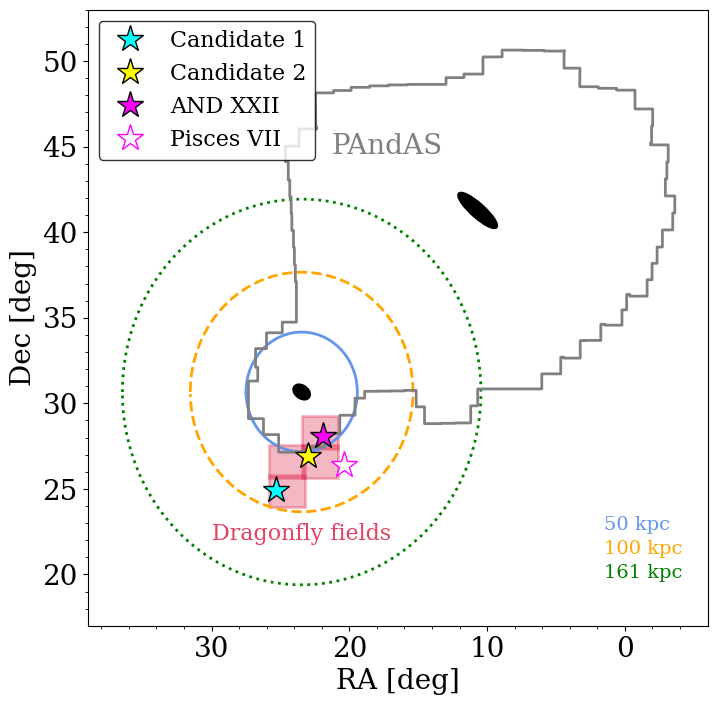

In [7]:


n = 10000
rvir = 161.
d = 794.
m33 = sc0

fieldcen = m33

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.xlabel('RA [deg]', fontsize=20)
plt.ylabel('Dec [deg]', fontsize=20)
and22 = SkyCoord('01h27m40.0s','28d05m25s', unit='deg')
m33 = SkyCoord('01h33m50.0s','30d39m37s', unit='deg')
m31 = SkyCoord('0h42m44.3s', '41d16m9s', unit='deg')
plt.plot(25.33584, 24.90581, '*', color='cyan' ,mec='black',ms=20, label='Candidate 1', zorder=5)
plt.plot(22.97674, 26.89809, '*', color='yellow' ,mec='black',ms=20, label='Candidate 2', zorder=5)
plt.plot(and22.ra.deg, and22.dec.deg, '*', color='magenta' ,mec='black',ms=20, label='AND XXII', zorder=5)
plt.plot(20.418750, 26.390000, '*', color='white' ,mec='magenta',ms=20, label='Pisces VII', zorder=5)


    
# unit circle at Dec=30 deg.                                                                                                                   
cpts = np.arange(0,360.0,1)
xpts = 1.0*np.cos(np.deg2rad(cpts))/np.cos(30.0*u.deg)
ypts = 1.0*np.sin(np.deg2rad(cpts))

xcirc50 = (xpts*3.5)+m33.ra.value
ycirc50 = (ypts*3.5)+m33.dec.value

plt.plot(xcirc50,ycirc50,color='cornflowerblue')

xcirc100 = (xpts*3.5*100.0/50.0)+m33.ra.value
ycirc100 = (ypts*3.5*100.0/50.0)+m33.dec.value

plt.plot(xcirc100,ycirc100,color='orange',ls='--')

xcirc161 = (xpts*3.5*161.0/50.0)+m33.ra.value
ycirc161 = (ypts*3.5*161.0/50.0)+m33.dec.value

plt.plot(xcirc161,ycirc161,color='green',ls=':')

dp = np.loadtxt('corners_PAndAS11.txt')
ra = dp[:,0]
dec = dp[:,1]
plt.plot(ra, dec, lw=2, color='gray')
plt.xlim(*plt.xlim()[::-1])
plt.figtext(0.43, 0.7, 'PAndAS', fontsize=20, color='gray')
circle= plt.Circle((m33.ra.deg, m33.dec.deg), 3.5, fill=False, color='cornflowerblue', lw=3, label='50 kpc')
circle2 = plt.Circle((m33.ra.deg, m33.dec.deg), 3.5*rvir/50., fill=False, color='green', lw=3, ls=':')
circle3 = plt.Circle((m33.ra.deg, m33.dec.deg), 3.5*100./50., fill=False, color='orange', lw=3, ls='--')

plt.xlim(39,-6)
plt.ylim(17,53)

from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Rectangle
from matplotlib.collections import PatchCollection
ring = Wedge((m33.ra.deg, m33.dec.deg), 3.5*100./50., 0, 360, width=(3.5*100./50. - 3.5)),  # Full ring                                        
p = PatchCollection(ring, alpha=0.1)
p.set_color('orange')

m31ell = Ellipse((m31.ra.deg, m31.dec.deg), (200./60.0), (50.0/60.0), angle=35, fill=True, linewidth=2, color='k')
ax.add_patch(m31ell)

m33ell = Ellipse((m33.ra.deg, m33.dec.deg), (73./60.0), (45.0/60.0), angle=23, fill=True, linewidth=2, color='k')
ax.add_patch(m33ell)

rasize = 2.6
decsize = 1.9

# plt.plot(22.0979889387619, 28.299663888888887,'co', ms=6, zorder=1000)
# plt.plot(22.0979889387619, 26.589663888888886,'co', ms=6)

# plt.plot(24.499999999999996, 26.589663888888886,'co', ms=6, zorder=1000)
# plt.plot(24.499999999999996, 24.87966388888889,'co', ms=6)
                               
ra_centers = [22.0979889387619, 22.0979889387619,24.499999999999996,24.499999999999996]
dec_centers = [28.299663888888887,26.589663888888886,26.589663888888886,24.87966388888889 ]

# for i in range(len(sc_fields)):
#     field = Rectangle([sc_fields[i].ra.deg-rasize/2, sc_fields[i].dec.deg-decsize/2], 3.3, 2.9, color='b', fill=False)
#     ax.add_patch(field)
    
for i in range(len(ra_centers)):
        field = Rectangle([ra_centers[i]-rasize/2, dec_centers[i]-decsize/2], 2.6, 1.9, lw=2, edgecolor='crimson', facecolor='crimson', fill=True, alpha=0.3)
        ax.add_patch(field)
#     if 24. < sc_fields[i].ra.deg < 26 and sc_fields[i].dec.deg < 27.:
#         field = Rectangle([sc_fields[i].ra.deg-rasize/2, sc_fields[i].dec.deg-decsize/2], 2.6, 1.9, lw=2, edgecolor='darkviolet', fill=False)
#         ax.add_patch(field)

plt.text(30, 22, 'Dragonfly fields',fontsize=16, color='crimson', alpha=0.8)

plt.legend(numpoints=1, fontsize=16, loc='upper left',edgecolor='black', facecolor=(1, 1, 1, 1))
plt.figtext(0.77, 0.23, r'50 kpc', color='cornflowerblue', fontsize=14)
plt.figtext(0.77, 0.2, r'100 kpc', color='orange', fontsize=14)
plt.figtext(0.77, 0.17, r'161 kpc', color='green', fontsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

#plt.savefig('M33_Dragonfly_fields_2022.png')